### Sobel Operator
    - The below program demonstrates sobel filter on an image

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from PIL import Image
from skimage import data
import scipy
import math
from scipy.ndimage import measurements
from skimage import data
from ipywidgets import interact, fixed, FloatSlider, IntSlider,FloatRangeSlider, Label

In [2]:
def apply_kernel(img):
    # ==================================================
    #                   Create Kernels
    # ==================================================
    x_sob = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)])
    y_sob = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)])
    
    # ==================================================
    #       Create Array to hold filtered image
    # ==================================================
    x_sob_image = np.zeros((512, 512))
    y_sob_image = np.zeros((512, 512))
    sob_image = np.zeros((512, 512))
    
    # ==================================================
    #           Apply padding to the image
    # ==================================================
    img = np.pad(img, (1, 1), 'edge')
    
    # ==================================================
    #               Perform Convolution
    # ==================================================
    for row in range(1, img.shape[0]-1):
        for col in range(1, img.shape[1]-1):
            x_sum = (x_sob.item(0, 0) * img.item(row-1, col-1)) + (x_sob.item(0, 2) * img.item(row-1, col+1)) + (x_sob.item(1, 0) * img.item(row, col-1)) + (x_sob.item(1, 2) * img.item(row, col+1)) + (x_sob.item(2, 0) * img.item(row+1, col-1)) + (x_sob.item(2, 2) * img.item(row+1, col+1))
            y_sum = (y_sob.item(0, 0) * img.item(row-1, col-1)) + (y_sob.item(0, 1) * img.item(row-1, col)) + (y_sob.item(0, 2) * img.item(row-1, col+1)) + (y_sob.item(2, 0) * img.item(row+1, col-1)) + (y_sob.item(2, 1) * img.item(row+1, col)) + (y_sob.item(2, 2) * img.item(row+1, col+1))
            x_sob_image.itemset((row-1, col-1), x_sum)
            y_sob_image.itemset((row-1, col-1), y_sum)
            sob_image.itemset((row-1, col-1), np.sqrt(x_sum**2 + y_sum**2))
 
    # ==================================================
    #               Displaying Images
    # ==================================================
    fig, axes_array = plt.subplots(1, 3)
    fig.set_size_inches(18,5)
    image_plot = axes_array[0].imshow(x_sob_image, cmap=plt.cm.gray)  
    axes_array[0].axis('off')
    axes_array[0].set(title='Gradient in X Direction')
    image_plot = axes_array[1].imshow(y_sob_image, cmap=plt.cm.gray)  
    axes_array[1].axis('off')
    axes_array[1].set(title='Gradient in y Direction')
    image_plot = axes_array[2].imshow(sob_image, cmap=plt.cm.gray)  
    axes_array[2].axis('off')
    axes_array[2].set(title='Edged Image')
    plt.show()

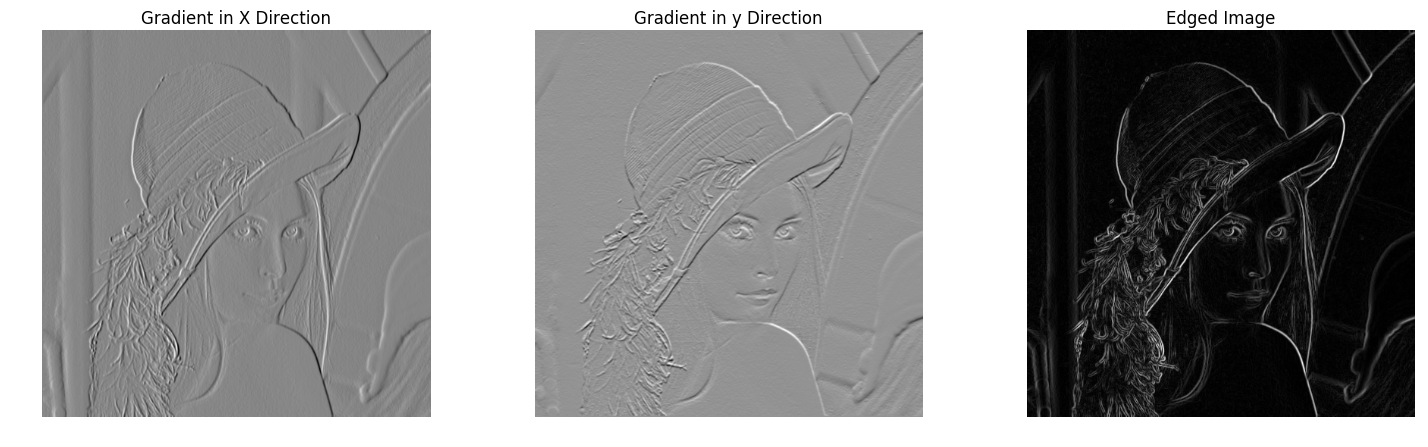

In [3]:
if __name__ == "__main__":
    image = cv2.imread('lena_gray.jpg', 0)
    apply_kernel(image)
